In [258]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [259]:
csv_file_path = 'Placement_Data_Full_Class.csv'
df = pd.read_csv(csv_file_path)
#df['salary'] = df['salary'].fillna(0)
print(df.head())
df.shape

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


(215, 15)

In [260]:
df = df.dropna()
# Convert categorical variables to numerical values
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

X = df.drop('salary', axis=1)
y = df['salary']

# Convert target variable (salary) into categories
y = pd.cut(y, bins=[0, 100000, 200000, 300000, 400000, np.inf], labels=[0, 1, 2, 3, 4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [261]:
model = MLPRegressor(hidden_layer_sizes=[32,32],activation='tanh',early_stopping=True,solver='sgd',tol=10**(-6),max_iter=1000,n_iter_no_change=50)
regr = model.fit(X_train, y_train)


In [262]:
y_pred =model.predict(X_test)
print(y_pred)
y_pred = np.clip(np.round(y_pred).astype(int), 0, 4)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[1.64040883 1.96877187 2.62486845 2.29023619 2.12321316 2.59917635
 2.23116511 1.73858588 2.36473139 2.32663081 2.92501633 2.10952164
 2.59406085 1.75868194 1.86893508 1.92362641 2.26996896 2.4460537
 1.78374545 2.04153175 1.97390975 2.45289123 2.14199643 1.91025004
 1.85895947 1.97897413 2.3582357  2.21730216 1.71047253 2.03154493
 2.64379818 2.37047137 2.17785626 2.65546004 2.21360524 2.72970274
 2.18757822]
[2 2 3 2 2 3 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 3 2]
Accuracy: 0.7027027027027027


### Visualize fitting history

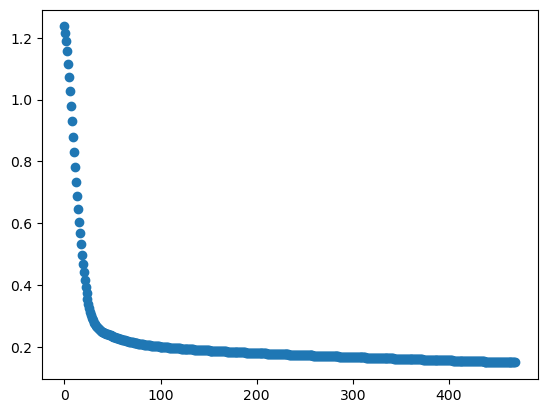

In [263]:
# print(regr.validation_scores_)
fig, ax = plt.subplots()
# training log-loss
ax.plot(regr.loss_curve_,"o")
plt.show()

The accuracy of this model is around 70%. The model uses activation='tanh', the hyperbolic tan function, solver='sgd' stochastic gradient descent. This figure shows the loss curve of "MLPRegressor" during training. The loss curve represents the error between the model prediction and the true target value as a function of iterations. The model stabilizes after about 40 iterations.